**Importing the necessary libraries**

In [3]:
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import AdaBoostClassifier    # For ensemble learning using AdaBoost
from sklearn.tree import DecisionTreeClassifier     # For decision tree classification
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For evaluating model performance
import seaborn as sns            # For data visualization
import matplotlib.pyplot as plt   # For plotting graphs
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

**Load the dataset**

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

**Displaying the first 5 rows of the dataset to get an overview of the data structure**

In [7]:
print(data.head())

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   Feature_24  Feature_25  Feature_26  Featu

**Displaying the First 10 Rows of the Dataset**

In [9]:
print(data.head(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   
5    843786         M      12.45      15.70      82.57      477.1    0.12780   
6    844359         M      18.25      19.98     119.60     1040.0    0.09463   
7  84458202         M      13.71      20.83      90.20      577.9    0.11890   
8    844981         M      13.00      21.82      87.50      519.8    0.12730   
9  84501001         M      12.46      24.04      83.97      475.9    0.11860   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760    0.30010    0.14710  ... 

**Displaying the Last 10 Rows of the Dataset**

In [11]:
print(data.tail(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
559  925291         B      11.51      23.93      74.52      403.5    0.09261   
560  925292         B      14.05      27.15      91.38      600.4    0.09929   
561  925311         B      11.20      29.37      70.67      386.0    0.07449   
562  925622         M      15.22      30.62     103.40      716.9    0.10480   
563  926125         M      20.92      25.09     143.00     1347.0    0.10990   
564  926424         M      21.56      22.39     142.00     1479.0    0.11100   
565  926682         M      20.13      28.25     131.20     1261.0    0.09780   
566  926954         M      16.60      28.08     108.30      858.1    0.08455   
567  927241         M      20.60      29.33     140.10     1265.0    0.11780   
568   92751         B       7.76      24.54      47.92      181.0    0.05263   

     Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
559    0.10210    0.11120    0.04105  

**Displaying the shape of the dataset.It returns the number of rows and columns in the DataFrame.**

In [13]:
data.shape

(569, 32)

**Displaying summary information about the dataset**

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

**Checking for missing values**

In [18]:
print(data.isnull().sum())

ID            0
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64


**To Display statistical summary of numerical columns in the dataset**

In [20]:
data.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



**To Display transposed statistical summary of numerical columns in the dataset**

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


**To Check for duplicate rows**

In [24]:
num_total_rows = len(data) # Calculate total number of rows
num_duplicate_rows = data.duplicated().sum() # Calculate number of duplicate rows
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100 # Calculate percentage of duplicate rows
print(f"Number of Rows with Duplicates: {num_duplicate_rows}") # Print the results
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


**Counting Unique Values for Each Column**

In [26]:
# Count unique values for each column
unique_counts = data.nunique()
# Display the unique counts
print(unique_counts)

ID            569
Diagnosis       2
Feature_1     456
Feature_2     479
Feature_3     522
Feature_4     539
Feature_5     474
Feature_6     537
Feature_7     537
Feature_8     542
Feature_9     432
Feature_10    499
Feature_11    540
Feature_12    519
Feature_13    533
Feature_14    528
Feature_15    547
Feature_16    541
Feature_17    533
Feature_18    507
Feature_19    498
Feature_20    545
Feature_21    457
Feature_22    511
Feature_23    514
Feature_24    544
Feature_25    411
Feature_26    529
Feature_27    539
Feature_28    492
Feature_29    500
Feature_30    535
dtype: int64


**Dropping unecessary columns (ID)**

In [33]:
if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)
print(data.columns) #verifying remaining columns

Index(['Diagnosis', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29',
       'Feature_30'],
      dtype='object')


**Encoding Target variables**

In [44]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # Map 'M' to 1, 'B' to 0
print(data.head())                      # Check the first few rows after encoding

   Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0          1      17.99      10.38     122.80     1001.0    0.11840   
1          1      20.57      17.77     132.90     1326.0    0.08474   
2          1      19.69      21.25     130.00     1203.0    0.10960   
3          1      11.42      20.38      77.58      386.1    0.14250   
4          1      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
0    0.27760     0.3001    0.14710     0.2419  ...       25.38       17.33   
1    0.07864     0.0869    0.07017     0.1812  ...       24.99       23.41   
2    0.15990     0.1974    0.12790     0.2069  ...       23.57       25.53   
3    0.28390     0.2414    0.10520     0.2597  ...       14.91       26.50   
4    0.13280     0.1980    0.10430     0.1809  ...       22.54       16.67   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0      184.60      2019.0  

**To Define Features and Target**

In [47]:
X = data.iloc[:, :-1]                   # All columns except the last one
y = data.iloc[:, -1]                    # Last column (target variable)
print(X.shape, y.shape)                 # Verify shapes of features and target

(569, 30) (569,)


**Scaling Features and Display the first few rows of the scaled features**

In [106]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.097064  -2.073335   1.269934   0.984375   1.568466   3.283515   
1   1.829821  -0.353632   1.685955   1.908708  -0.826962  -0.487072   
2   1.579888   0.456187   1.566503   1.558884   0.942210   1.052926   
3  -0.768909   0.253732  -0.592687  -0.764464   3.283553   3.402909   
4   1.750297  -1.151816   1.776573   1.826229   0.280372   0.539340   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0   2.652874   2.532475   2.217515    2.255747  ...    1.886690   -1.359293   
1  -0.023846   0.548144   0.001392   -0.868652  ...    1.805927   -0.369203   
2   1.363478   2.037231   0.939685   -0.398008  ...    1.511870   -0.023974   
3   1.915897   1.451707   2.867383    4.910919  ...   -0.281464    0.133984   
4   1.371011   1.428493  -0.009560   -0.562450  ...    1.298575   -1.466770   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    2.303601    2.00

**Outlier Detection**

In [86]:
# Calculate and visualize the impact of outliers
# Define IQR method for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [88]:
# Identify outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print("\nOutliers detected:")
print(outliers.sum())


Outliers detected:
Diagnosis      0
Feature_1     14
Feature_2      7
Feature_3     13
Feature_4     25
Feature_5      6
Feature_6     16
Feature_7     18
Feature_8     10
Feature_9     15
Feature_10    15
Feature_11    38
Feature_12    20
Feature_13    38
Feature_14    65
Feature_15    30
Feature_16    28
Feature_17    22
Feature_18    19
Feature_19    27
Feature_20    28
Feature_21    17
Feature_22     5
Feature_23    15
Feature_24    35
Feature_25     7
Feature_26    16
Feature_27    12
Feature_28     0
Feature_29    23
Feature_30    24
dtype: int64


**Visualization of Outlier Distribution Across Features After Scaling**

In [100]:
# Get the number of outliers for each column
num_outliers_per_column = outliers.sum()

C:\Users\91979\AppData\Local\Temp\ipykernel_648\4057394461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values, palette='viridis')  # Set color palette


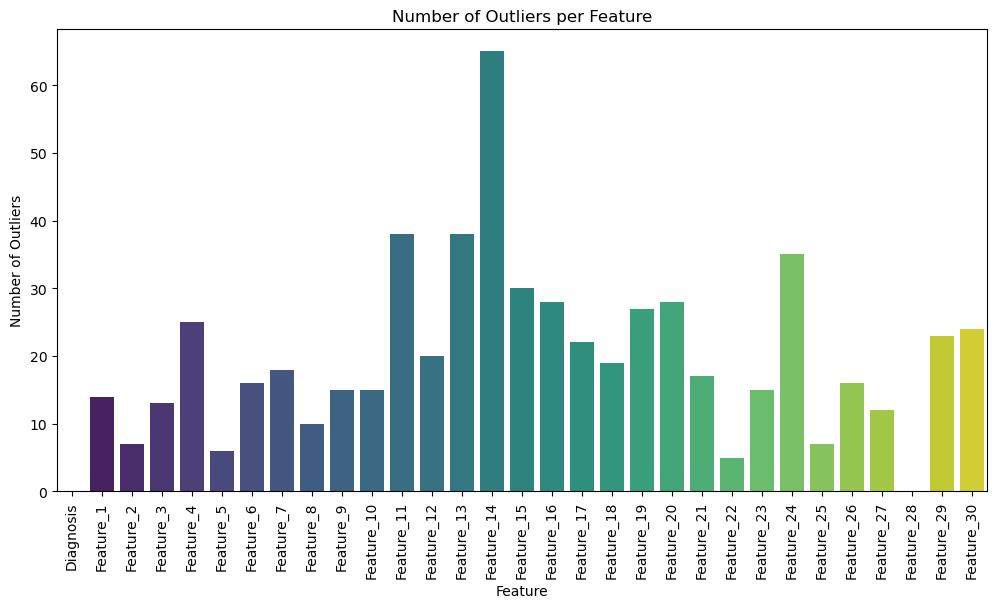

In [102]:
# Visualize the number of outliers per feature with a color palette
plt.figure(figsize=(12, 6))
sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values, palette='viridis')  # Set color palette
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.xlabel("Feature")
plt.ylabel("Number of Outliers")
plt.show()

**Target Distribution Visualization, and Feature Correlation Analysis**

C:\Users\91979\AppData\Local\Temp\ipykernel_648\2408028487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diagnosis', data=data, palette={'0': 'blue', '1': 'red'})


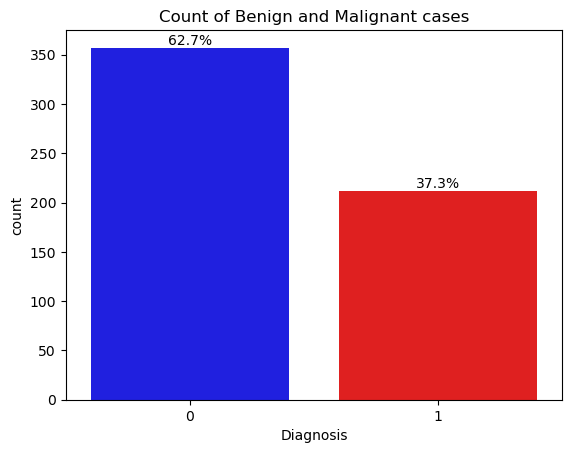

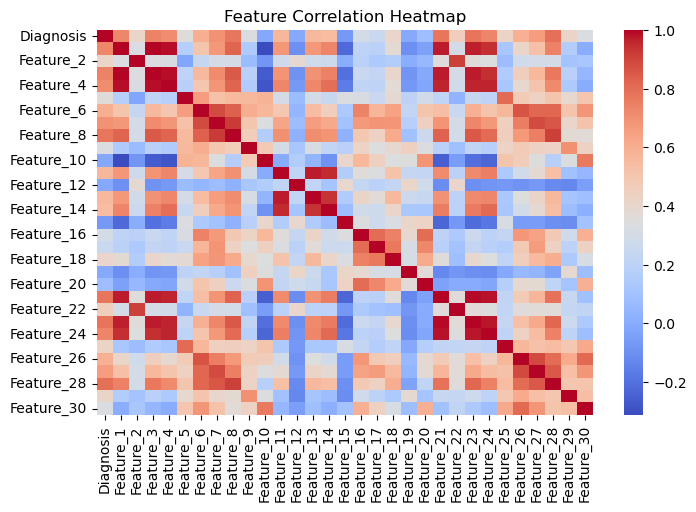

In [61]:
# Countplot of the target variable (Benign vs Malignant) with percentages on top
ax = sns.countplot(x='Diagnosis', data=data, palette={'0': 'blue', '1': 'red'})
plt.title('Count of Benign and Malignant cases')

# Calculate percentages and add text annotations
total = len(data)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{count / total * 100:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2, count + 3, percentage, ha="center")

plt.show()

# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


**Pairwise Feature Visualization Using Seaborn's Pairplot**

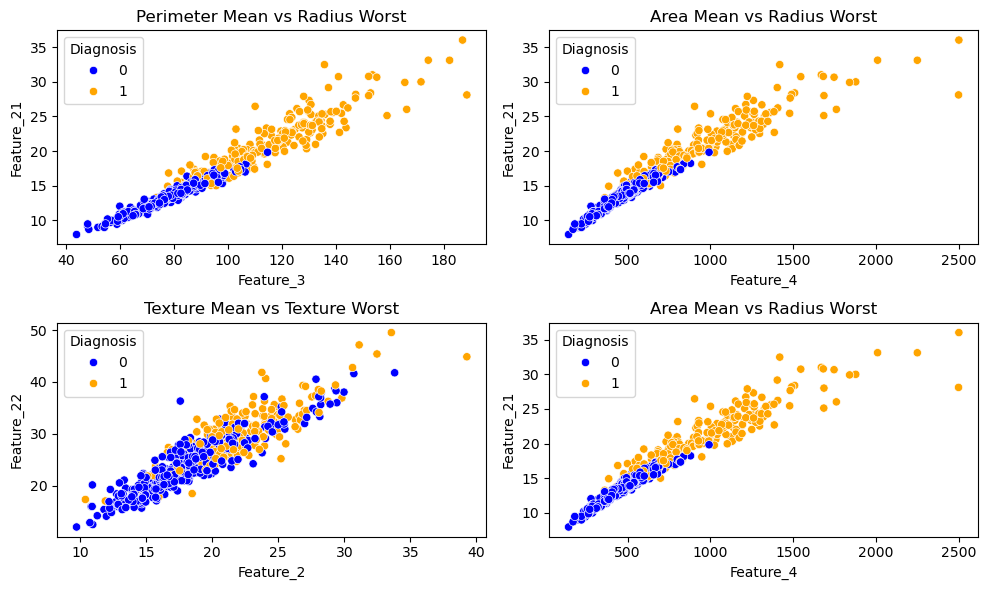

In [64]:
# Plotting positive correlated features
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['Feature_3'], y=data['Feature_21'], hue=data['Diagnosis'], palette=['blue', 'orange'])
plt.title('Perimeter Mean vs Radius Worst')

plt.subplot(2, 2, 2)
sns.scatterplot(x=data['Feature_4'], y=data['Feature_21'], hue=data['Diagnosis'], palette=['blue', 'orange'])
plt.title('Area Mean vs Radius Worst')

plt.subplot(2, 2, 3)
sns.scatterplot(x=data['Feature_2'], y=data['Feature_22'], hue=data['Diagnosis'], palette=['blue', 'orange'])
plt.title('Texture Mean vs Texture Worst')

plt.subplot(2, 2, 4)
sns.scatterplot(x=data['Feature_4'], y=data['Feature_21'], hue=data['Diagnosis'], palette=['blue', 'orange'])
plt.title('Area Mean vs Radius Worst')

plt.tight_layout()
plt.show()


**Data Splitting for Training and Testing Using Scikit-Learn's train_test_split**

In [108]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Applying SMOTE on training data**

In [110]:
# Applying SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Initialize and Train the AdaBoost Model**

In [114]:
# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Decision stump as weak learner
    n_estimators=50,  # Number of weak learners
    learning_rate=1.0,  # Default learning rate
    algorithm="SAMME",  # Set to SAMME to avoid the FutureWarning
    random_state=42
)

**Training the model with SMOTE**

In [118]:
# Training the model with SMOTE-applied data
ada_classifier.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

**Predicting on the test**

In [121]:
# Predicting on the test set
y_pred_smote = ada_classifier.predict(X_test)

**Calculating performance metrics**

In [123]:
# Calculating performance metrics
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

**Displaying the evaluation results and Visualization of Confusion Matrix**


Accuracy: 0.9825

Precision: 0.9767

Recall: 0.9767

F1 Score: 0.9767

Confusion Matrix:
[[70  1]
 [ 1 42]]


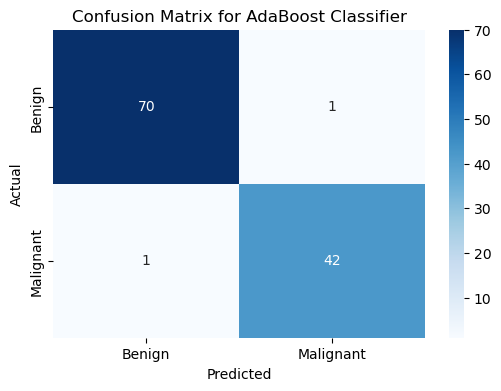

In [127]:
# Displaying the evaluation results
print(f"\nAccuracy: {accuracy_smote:.4f}")
print(f"\nPrecision: {precision_smote:.4f}")
print(f"\nRecall: {recall_smote:.4f}")
print(f"\nF1 Score: {f1_smote:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_smote)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

**Generating the classification report**

In [131]:
# Generate the classification report
report_smote = classification_report(y_test, y_pred_smote)

# Print the classification report
print("Classification Report:\n", report_smote)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

